## Introducción a Tensor Flow

In [1]:
import tensorflow as tf
import os as os
import skimage.data as imd
import numpy as np

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1, x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [5]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

## Ejemplo de aprendizaje neuronal de las señales de tráfico

In [7]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir, f)
                       for f in os.listdir(label_dir)
                       if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
            
    return images, labels
    


In [8]:
main_dir = "C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [9]:
images, labels = load_ml_data(train_data_dir)

In [10]:
len(images)

4575

In [11]:
len(labels)

4575

In [12]:
type(images)

list

In [13]:
labels = np.array(labels)
images = np.array(images)

In [14]:
images.ndim

1

In [15]:
images.size

4575

In [16]:
images[0]

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [17]:
labels.ndim

1

In [18]:
labels.size

4575

In [19]:
len(set(labels))

62

In [20]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [21]:
labels.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [22]:
images.itemsize

8

In [23]:
images.nbytes

36600

In [24]:
images.nbytes / images.itemsize

4575.0

In [25]:
import matplotlib.pyplot as plt

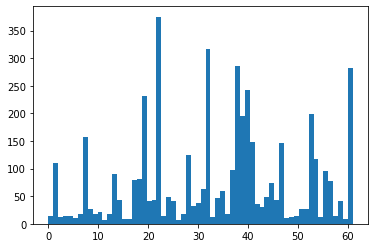

In [26]:
plt.hist(labels, bins = len(set(labels)) )
plt.show()

In [27]:
import random

In [28]:
rand_signs = random.sample(range(0, len(labels)),6)
rand_signs

[4452, 4138, 1202, 1133, 881, 3443]

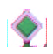

Forma:(47, 46, 3), min10, max255


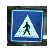

Forma:(152, 152, 3), min0, max255


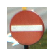

Forma:(105, 99, 3), min12, max255


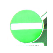

Forma:(148, 151, 3), min10, max255


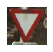

Forma:(95, 98, 3), min15, max255


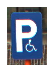

Forma:(116, 79, 3), min0, max255


In [29]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min{1}, max{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

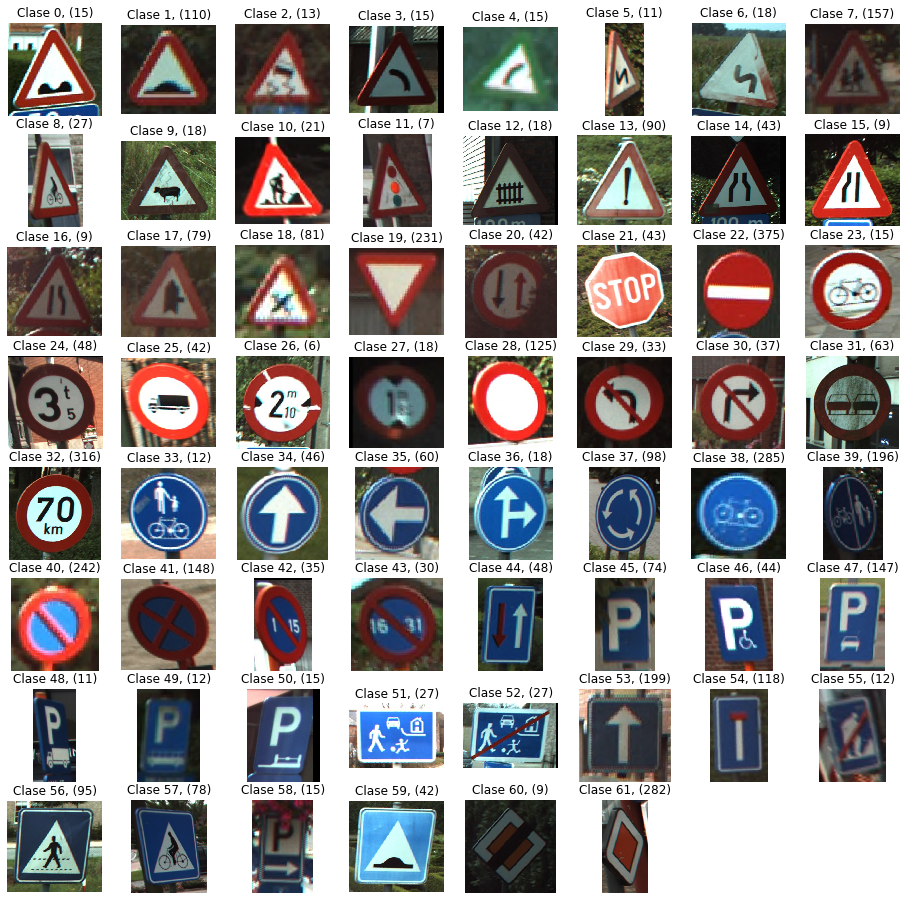

In [30]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0}, ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
    

## Modelo de red neuronal con Tensor Flow

* Las imagenes no son todas del mismo tamaño
* Hay 62 tipos de imágenes desde la 0 a la 61
* La distribución de señales de tráfico no es uniforme (Algunas salen más que otras)

In [31]:
from skimage import transform

In [32]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("El tamaño minimo es: {0}x{1}".format(h,w))

El tamaño minimo es: 22x20


In [33]:
images30 = [transform.resize(image, (30, 30)) for image in images]

In [34]:
images30[0].shape

(30, 30, 3)

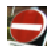

Forma:(30, 30, 3), min0.023594771241830674, max0.996078431372549


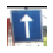

Forma:(30, 30, 3), min0.013725490196078877, max0.997058823529412


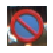

Forma:(30, 30, 3), min0.056928104575163355, max0.9912941176470589


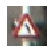

Forma:(30, 30, 3), min0.10196078431372584, max1.0


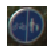

Forma:(30, 30, 3), min0.06043572984749427, max0.9137254901960757


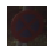

Forma:(30, 30, 3), min0.07141176470588233, max0.30000000000000004


In [35]:
rand_signs = random.sample(range(0, len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6, i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min{1}, max{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

In [36]:
from skimage.color import rgb2gray

In [37]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

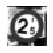

Forma:(30, 30), min0.07019266666666735, max0.9897833333333335


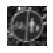

Forma:(30, 30), min0.028171485294117688, max0.7387839379084952


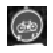

Forma:(30, 30), min0.04534954248366014, max0.9937461002178648


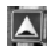

Forma:(30, 30), min0.04854756862745099, max0.5920497908496732


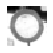

Forma:(30, 30), min0.1579715381263616, max0.996078431372549


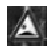

Forma:(30, 30), min0.038477632679738576, max0.772935635947712


In [38]:
rand_signs = random.sample(range(0, len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1, 6, i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma:{0}, min{1}, max{2}".format(temp_im.shape,
                                             temp_im.min(),
                                             temp_im.max()))

### Creando el módelo

In [39]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 30, 30])
y = tf.placeholder(dtype=tf.int32, shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.arg_max(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [40]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [41]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [42]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [43]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

### Entrenando el módelo

In [44]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(401):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict ={
                                  x: images30,
                                  y: list(labels)
                              })
    
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict ={
                                  x: images30,
                                  y: list(labels)
                              })
    if i%50 ==0:
        print("EPOCH",i)
        print("Eficiencia: ", accuracy_val)
        print("Pérdidas: ", loss_val)
      #  print("Fin del Epoch", i)


EPOCH 0
Eficiencia:  33.800438
Pérdidas:  3.9907722
EPOCH 50
Eficiencia:  29.109509
Pérdidas:  2.473321
EPOCH 100
Eficiencia:  29.619673
Pérdidas:  2.176514
EPOCH 150
Eficiencia:  29.419891
Pérdidas:  2.0342145
EPOCH 200
Eficiencia:  29.331148
Pérdidas:  1.9450663
EPOCH 250
Eficiencia:  29.129835
Pérdidas:  1.8823209
EPOCH 300
Eficiencia:  28.972677
Pérdidas:  1.8352634
EPOCH 350
Eficiencia:  28.81224
Pérdidas:  1.7979275
EPOCH 400
Eficiencia:  28.56459
Pérdidas:  1.7677443


## Evaluación de la red neuronal

In [45]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [46]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [47]:
prediction

array([13, 28, 53,  1, 32, 28, 32, 40,  7, 28, 21, 40, 41, 47, 28,  7,  7,
       22, 54, 19, 30, 22, 32, 18, 32, 53, 32, 22, 32, 18, 28, 13, 54, 22,
       43, 18, 22, 40, 41, 22], dtype=int64)

In [48]:
sample_labels

[13,
 28,
 53,
 1,
 37,
 39,
 32,
 40,
 7,
 61,
 21,
 40,
 41,
 47,
 28,
 9,
 56,
 39,
 61,
 36,
 30,
 38,
 29,
 18,
 8,
 53,
 32,
 22,
 32,
 18,
 38,
 38,
 38,
 22,
 43,
 56,
 39,
 40,
 40,
 22]

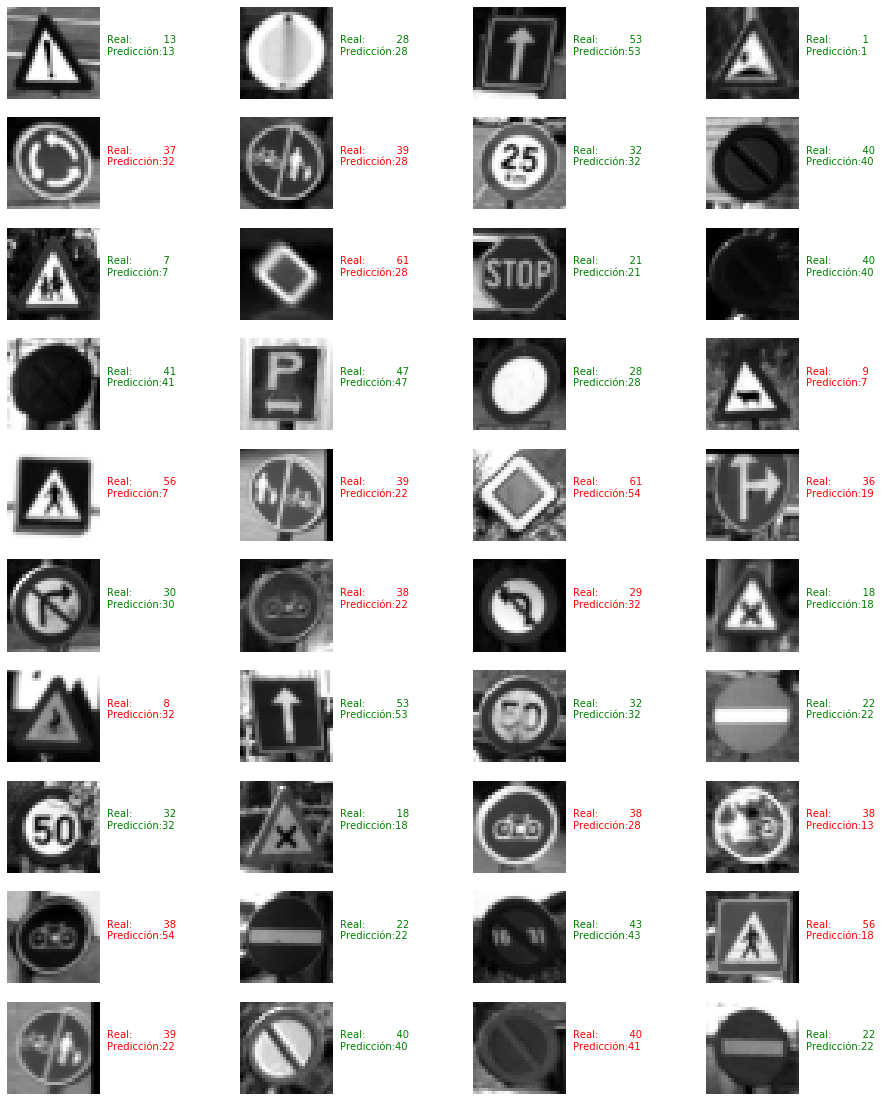

In [49]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi= prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32, 15, "Real:          {0}\nPredicción:{1}".format(truth, predi),fontsize = 10, color = color)
    plt.imshow(sample_images[i], cmap ="gray")
plt.show() 

In [50]:
test_images, test_labels = load_ml_data(test_data_dir)

In [51]:
test_images30 = [transform.resize(im,(30, 30)) for im in test_images]

In [52]:
len(test_images30)

2520

In [53]:
test_images30 = rgb2gray(np.array(test_images30))

In [54]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [55]:
match_count = sum([int (y == y_) for y, y_ in zip(test_labels, prediction)])
match_count

1554

In [56]:
acc = match_count / len(test_labels)*100 
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 61.67
